In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.circuit import Gate
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

import numpy as np
from math import pi

In [2]:
def draw(qc, measure=True, state_vector=False, bloch_sphere=False):
    display(qc.draw(output='mpl'))
    if(not measure or not state_vector and not bloch_sphere): return

    # Measure
    usim = Aer.get_backend('aer_simulator')
    qc.save_statevector()
    qobj = assemble(qc)
    final_state = usim.run(qobj).result().get_statevector()
    
    # Print State Vector
    if(measure and state_vector):
        display(array_to_latex(final_state, prefix="\\text{Statevector = }"))
    
    # Print Bloch Sphere of the inputs
    if(measure and bloch_sphere):
        display(plot_bloch_multivector(final_state))

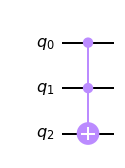

In [4]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
draw(qc)

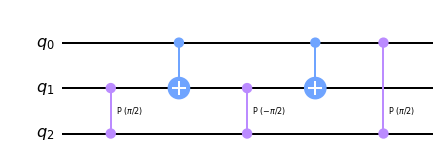

In [8]:
qc = QuantumCircuit(3)

theta = pi/2

# This is the controlled-controlled-U gate.
qc.cp(theta,b,t)
qc.cx(a,b)
qc.cp(-theta,b,t)
qc.cx(a,b)
qc.cp(theta,a,t)
draw(qc)

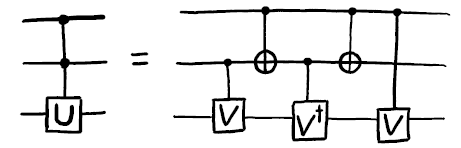


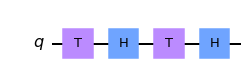

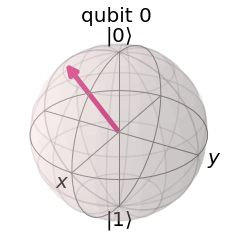

In [12]:
qc = QuantumCircuit(1)
qc.t(0)
qc.h(0)
qc.t(0)
qc.h(0)
draw(qc, bloch_sphere=True)

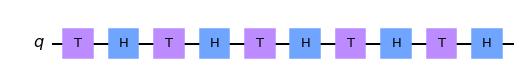

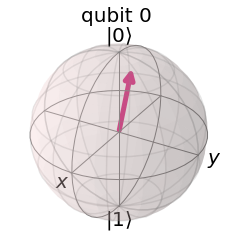

In [25]:
qc = QuantumCircuit(1)
qc.t(0)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.h(0)
draw(qc, bloch_sphere=True)

`T` and `H` gates can be made more fault tollerant, so using the above configuration, we can achieve any angle `2*pi/n` using `n` gates